# 客户数据探索性数据分析 (EDA)
## Exploratory Data Analysis for Customer Database

本Notebook进行了深度的客户数据分析，包括：
- 数据质量评估
- 客户特征分布
- 资产和产品分析
- 行为指标分析
- 相关性分析
- 商业洞察

## 1. 环境准备和数据加载

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# 设置可视化风格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['axes.unicode_minus'] = False

print("✓ 库导入完成")

✓ 库导入完成


## 2. 数据加载

In [2]:
# 加载数据
customer_base = pd.read_csv('customer_base.csv')
customer_behavior = pd.read_csv('customer_behavior_assets.csv')

print(f"客户基本信息数据形状: {customer_base.shape}")
print(f"客户行为资产数据形状: {customer_behavior.shape}")
print(f"\n客户基本信息数据列: {list(customer_base.columns)}")
print(f"\n客户行为资产数据列: {list(customer_behavior.columns)}")

客户基本信息数据形状: (10000, 12)
客户行为资产数据形状: (120000, 24)

客户基本信息数据列: ['customer_id', 'name', 'age', 'gender', 'occupation', 'occupation_type', 'monthly_income', 'open_account_date', 'lifecycle_stage', 'marriage_status', 'city_level', 'branch_name']

客户行为资产数据列: ['id', 'customer_id', 'total_assets', 'deposit_balance', 'financial_balance', 'fund_balance', 'insurance_balance', 'asset_level', 'deposit_flag', 'financial_flag', 'fund_flag', 'insurance_flag', 'product_count', 'financial_repurchase_count', 'credit_card_monthly_expense', 'investment_monthly_count', 'app_login_count', 'app_financial_view_time', 'app_product_compare_count', 'last_app_login_time', 'last_contact_time', 'contact_result', 'marketing_cool_period', 'stat_month']


## 3. 数据质量评估

In [3]:
# 客户基本信息数据质量
print("="*60)
print("客户基本信息数据质量评估")
print("="*60)
print("\n数据类型:")
print(customer_base.dtypes)

print("\n缺失值统计:")
missing_data = customer_base.isnull().sum()
missing_pct = (missing_data / len(customer_base) * 100).round(2)
missing_df = pd.DataFrame({'缺失数量': missing_data, '缺失比例(%)': missing_pct})
print(missing_df[missing_df['缺失数量'] > 0])

print("\n基本统计:")
print(customer_base.describe())

客户基本信息数据质量评估

数据类型:
customer_id           object
name                  object
age                    int64
gender                object
occupation            object
occupation_type       object
monthly_income       float64
open_account_date     object
lifecycle_stage       object
marriage_status       object
city_level            object
branch_name           object
dtype: object

缺失值统计:
Empty DataFrame
Columns: [缺失数量, 缺失比例(%)]
Index: []

基本统计:
                age  monthly_income
count  10000.000000    10000.000000
mean      44.495200    34092.995336
std        9.613606    18511.437319
min       25.000000     8017.020000
25%       38.000000    20268.657500
50%       44.000000    29802.375000
75%       51.000000    43628.310000
max       65.000000    99948.900000


In [4]:
# 客户行为资产数据质量
print("="*60)
print("客户行为资产数据质量评估")
print("="*60)
print("\n数据类型:")
print(customer_behavior.dtypes)

print("\n缺失值统计:")
missing_data = customer_behavior.isnull().sum()
missing_pct = (missing_data / len(customer_behavior) * 100).round(2)
missing_df = pd.DataFrame({'缺失数量': missing_data, '缺失比例(%)': missing_pct})
print(missing_df[missing_df['缺失数量'] > 0])

print("\n基本统计 (数值字段):")
print(customer_behavior.describe())

客户行为资产数据质量评估

数据类型:
id                              object
customer_id                     object
total_assets                   float64
deposit_balance                float64
financial_balance              float64
fund_balance                   float64
insurance_balance              float64
asset_level                     object
deposit_flag                     int64
financial_flag                   int64
fund_flag                        int64
insurance_flag                   int64
product_count                    int64
financial_repurchase_count       int64
credit_card_monthly_expense    float64
investment_monthly_count         int64
app_login_count                  int64
app_financial_view_time          int64
app_product_compare_count        int64
last_app_login_time             object
last_contact_time               object
contact_result                  object
marketing_cool_period           object
stat_month                      object
dtype: object

缺失值统计:
                    缺失

## 4. 客户特征分析

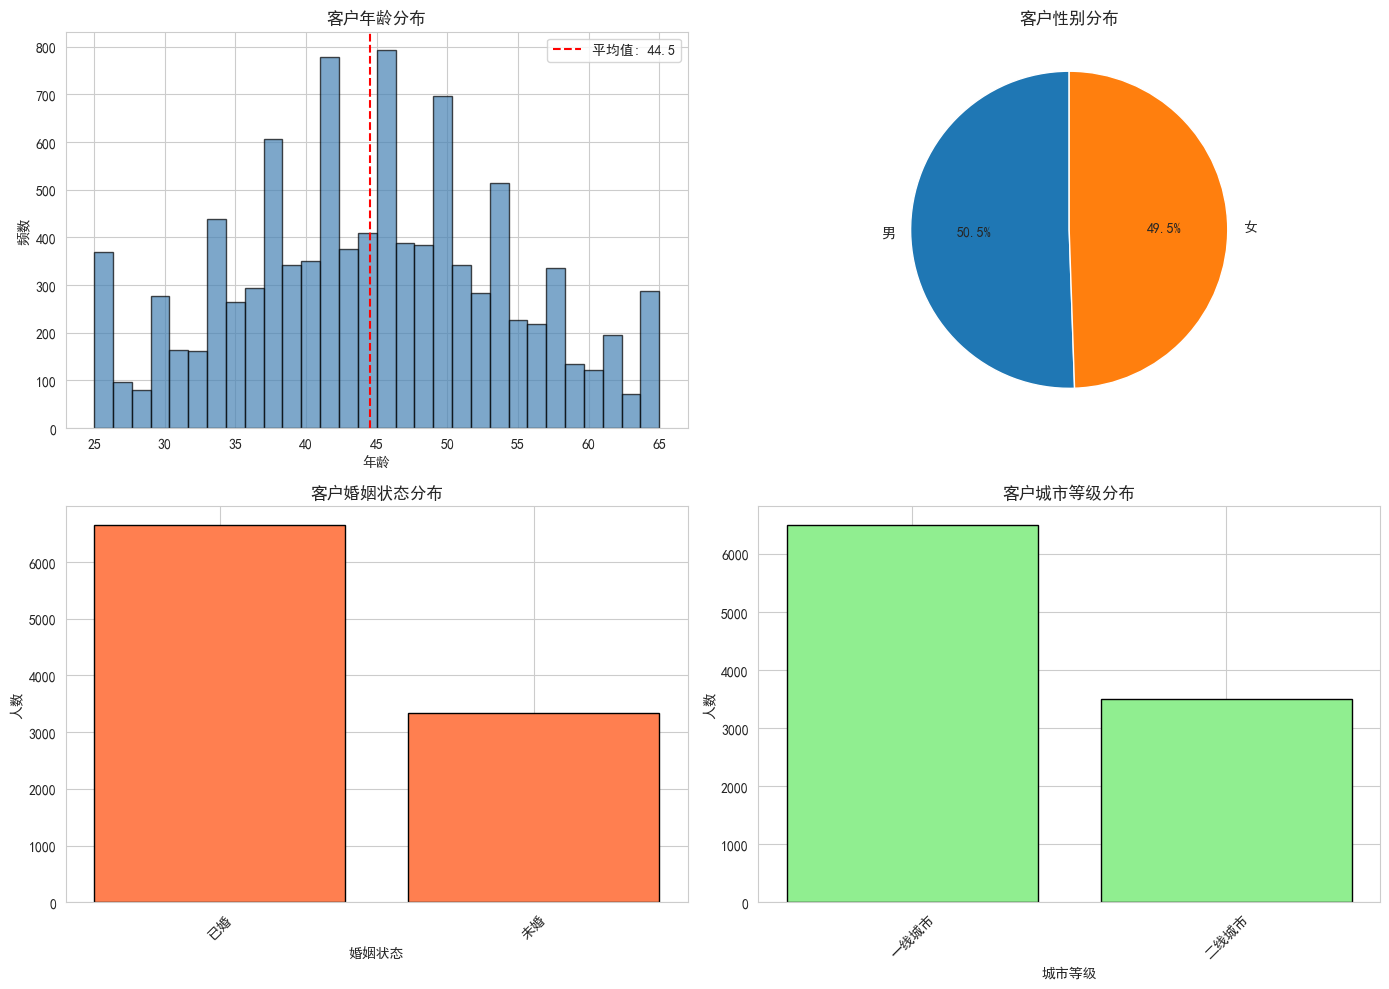


年龄统计:
  平均年龄: 44.50
  中位数: 44.00
  标准差: 9.61
  范围: 25-65


In [5]:
# 年龄分布
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 年龄分布直方图
axes[0, 0].hist(customer_base['age'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('年龄')
axes[0, 0].set_ylabel('频数')
axes[0, 0].set_title('客户年龄分布')
axes[0, 0].axvline(customer_base['age'].mean(), color='red', linestyle='--', label=f'平均值: {customer_base["age"].mean():.1f}')
axes[0, 0].legend()

# 性别分布
gender_counts = customer_base['gender'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('客户性别分布')

# 婚姻状态分布
marriage_counts = customer_base['marriage_status'].value_counts()
axes[1, 0].bar(marriage_counts.index, marriage_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_xlabel('婚姻状态')
axes[1, 0].set_ylabel('人数')
axes[1, 0].set_title('客户婚姻状态分布')
axes[1, 0].tick_params(axis='x', rotation=45)

# 城市等级分布
city_counts = customer_base['city_level'].value_counts()
axes[1, 1].bar(city_counts.index, city_counts.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('城市等级')
axes[1, 1].set_ylabel('人数')
axes[1, 1].set_title('客户城市等级分布')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n年龄统计:")
print(f"  平均年龄: {customer_base['age'].mean():.2f}")
print(f"  中位数: {customer_base['age'].median():.2f}")
print(f"  标准差: {customer_base['age'].std():.2f}")
print(f"  范围: {customer_base['age'].min()}-{customer_base['age'].max()}")

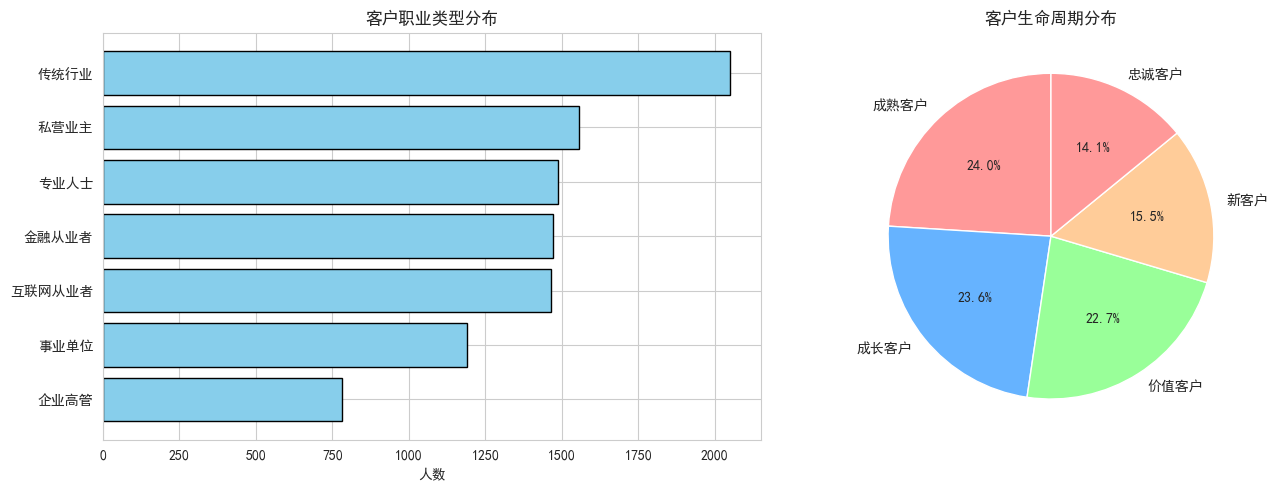


职业类型分布:
occupation_type
传统行业      2049
私营业主      1556
专业人士      1487
金融从业者     1470
互联网从业者    1465
事业单位      1191
企业高管       782
Name: count, dtype: int64

生命周期分布:
lifecycle_stage
成熟客户    2402
成长客户    2363
价值客户    2274
新客户     1552
忠诚客户    1409
Name: count, dtype: int64


In [6]:
# 职业类型分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

occupation_type_counts = customer_base['occupation_type'].value_counts()
axes[0].barh(occupation_type_counts.index, occupation_type_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('人数')
axes[0].set_title('客户职业类型分布')
axes[0].invert_yaxis()

# 生命周期阶段
lifecycle_counts = customer_base['lifecycle_stage'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[1].pie(lifecycle_counts.values, labels=lifecycle_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('客户生命周期分布')

plt.tight_layout()
plt.show()

print("\n职业类型分布:")
print(occupation_type_counts)
print("\n生命周期分布:")
print(lifecycle_counts)

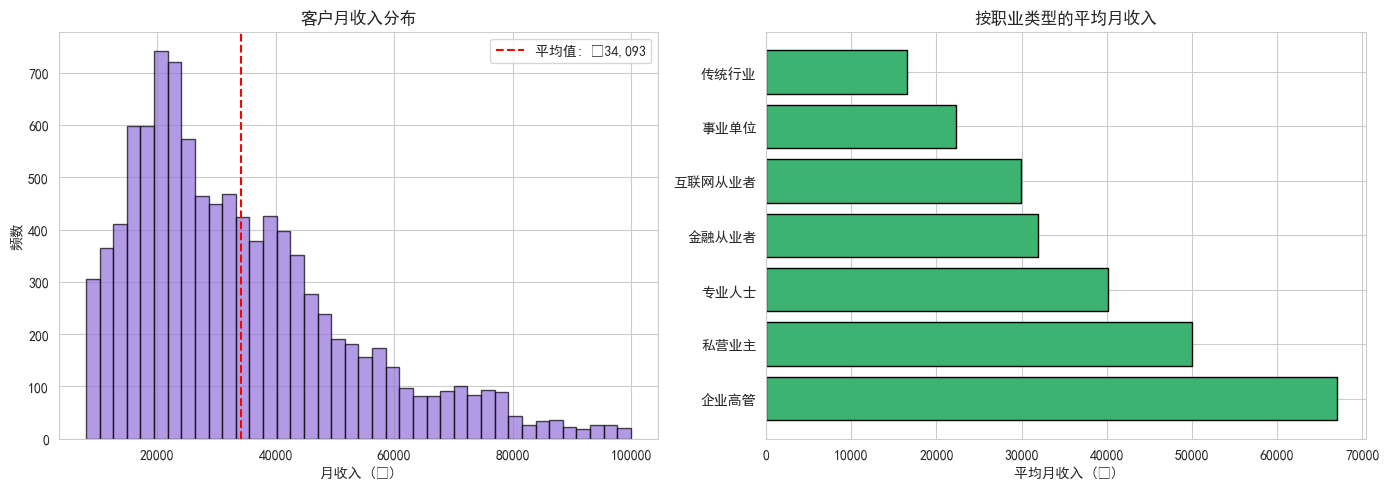


收入统计:
  平均月收入: ¥34,093.00
  中位数: ¥29,802.38
  标准差: ¥18,511.44
  范围: ¥8,017 - ¥99,949


In [7]:
# 收入分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 月收入分布
axes[0].hist(customer_base['monthly_income'], bins=40, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('月收入 (¥)')
axes[0].set_ylabel('频数')
axes[0].set_title('客户月收入分布')
axes[0].axvline(customer_base['monthly_income'].mean(), color='red', linestyle='--', label=f'平均值: ¥{customer_base["monthly_income"].mean():,.0f}')
axes[0].legend()

# 按职业类型的收入
income_by_occupation = customer_base.groupby('occupation_type')['monthly_income'].mean().sort_values(ascending=False)
axes[1].barh(income_by_occupation.index, income_by_occupation.values, color='mediumseagreen', edgecolor='black')
axes[1].set_xlabel('平均月收入 (¥)')
axes[1].set_title('按职业类型的平均月收入')

plt.tight_layout()
plt.show()

print("\n收入统计:")
print(f"  平均月收入: ¥{customer_base['monthly_income'].mean():,.2f}")
print(f"  中位数: ¥{customer_base['monthly_income'].median():,.2f}")
print(f"  标准差: ¥{customer_base['monthly_income'].std():,.2f}")
print(f"  范围: ¥{customer_base['monthly_income'].min():,.0f} - ¥{customer_base['monthly_income'].max():,.0f}")

## 5. 资产和产品分析

In [8]:
# 合并数据进行分析 (取最新数据)
customer_behavior_latest = customer_behavior.sort_values('stat_month').drop_duplicates('customer_id', keep='last')
merged_data = customer_base.merge(customer_behavior_latest, on='customer_id', how='inner')

print(f"合并后数据形状: {merged_data.shape}")
print(f"\n客户总数: {len(customer_base)}")
print(f"有行为记录的客户: {len(customer_behavior_latest)}")

合并后数据形状: (10000, 35)

客户总数: 10000
有行为记录的客户: 10000


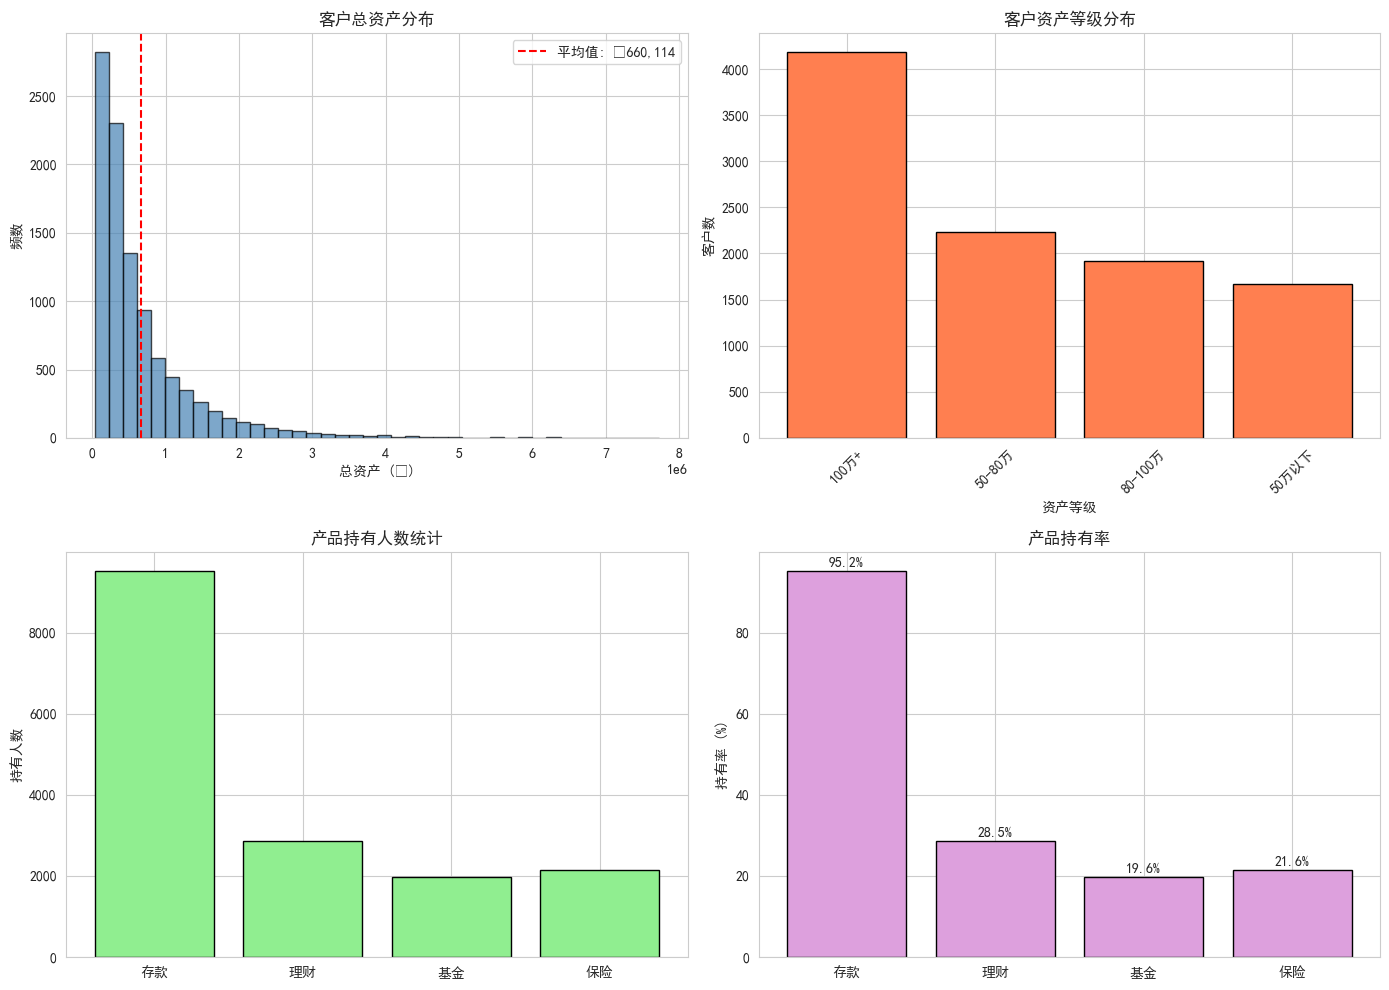


资产统计:
  平均总资产: ¥660,114.01
  中位数: ¥403,110.07
  最大值: ¥7,732,841.80
  最小值: ¥30,152.72


In [9]:
# 总资产分析
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 总资产分布
axes[0, 0].hist(customer_behavior_latest['total_assets'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('总资产 (¥)')
axes[0, 0].set_ylabel('频数')
axes[0, 0].set_title('客户总资产分布')
axes[0, 0].axvline(customer_behavior_latest['total_assets'].mean(), color='red', linestyle='--', label=f'平均值: ¥{customer_behavior_latest["total_assets"].mean():,.0f}')
axes[0, 0].legend()

# 资产等级分布
asset_level_counts = customer_behavior_latest['asset_level'].value_counts()
axes[0, 1].bar(asset_level_counts.index, asset_level_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('资产等级')
axes[0, 1].set_ylabel('客户数')
axes[0, 1].set_title('客户资产等级分布')
axes[0, 1].tick_params(axis='x', rotation=45)

# 产品持有情况
product_flags = customer_behavior_latest[['deposit_flag', 'financial_flag', 'fund_flag', 'insurance_flag']].sum()
product_names = ['存款', '理财', '基金', '保险']
axes[1, 0].bar(product_names, product_flags.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_ylabel('持有人数')
axes[1, 0].set_title('产品持有人数统计')

# 产品持有率
product_rate = (product_flags.values / len(customer_behavior_latest) * 100)
axes[1, 1].bar(product_names, product_rate, color='plum', edgecolor='black')
axes[1, 1].set_ylabel('持有率 (%)')
axes[1, 1].set_title('产品持有率')
for i, v in enumerate(product_rate):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print("\n资产统计:")
print(f"  平均总资产: ¥{customer_behavior_latest['total_assets'].mean():,.2f}")
print(f"  中位数: ¥{customer_behavior_latest['total_assets'].median():,.2f}")
print(f"  最大值: ¥{customer_behavior_latest['total_assets'].max():,.2f}")
print(f"  最小值: ¥{customer_behavior_latest['total_assets'].min():,.2f}")

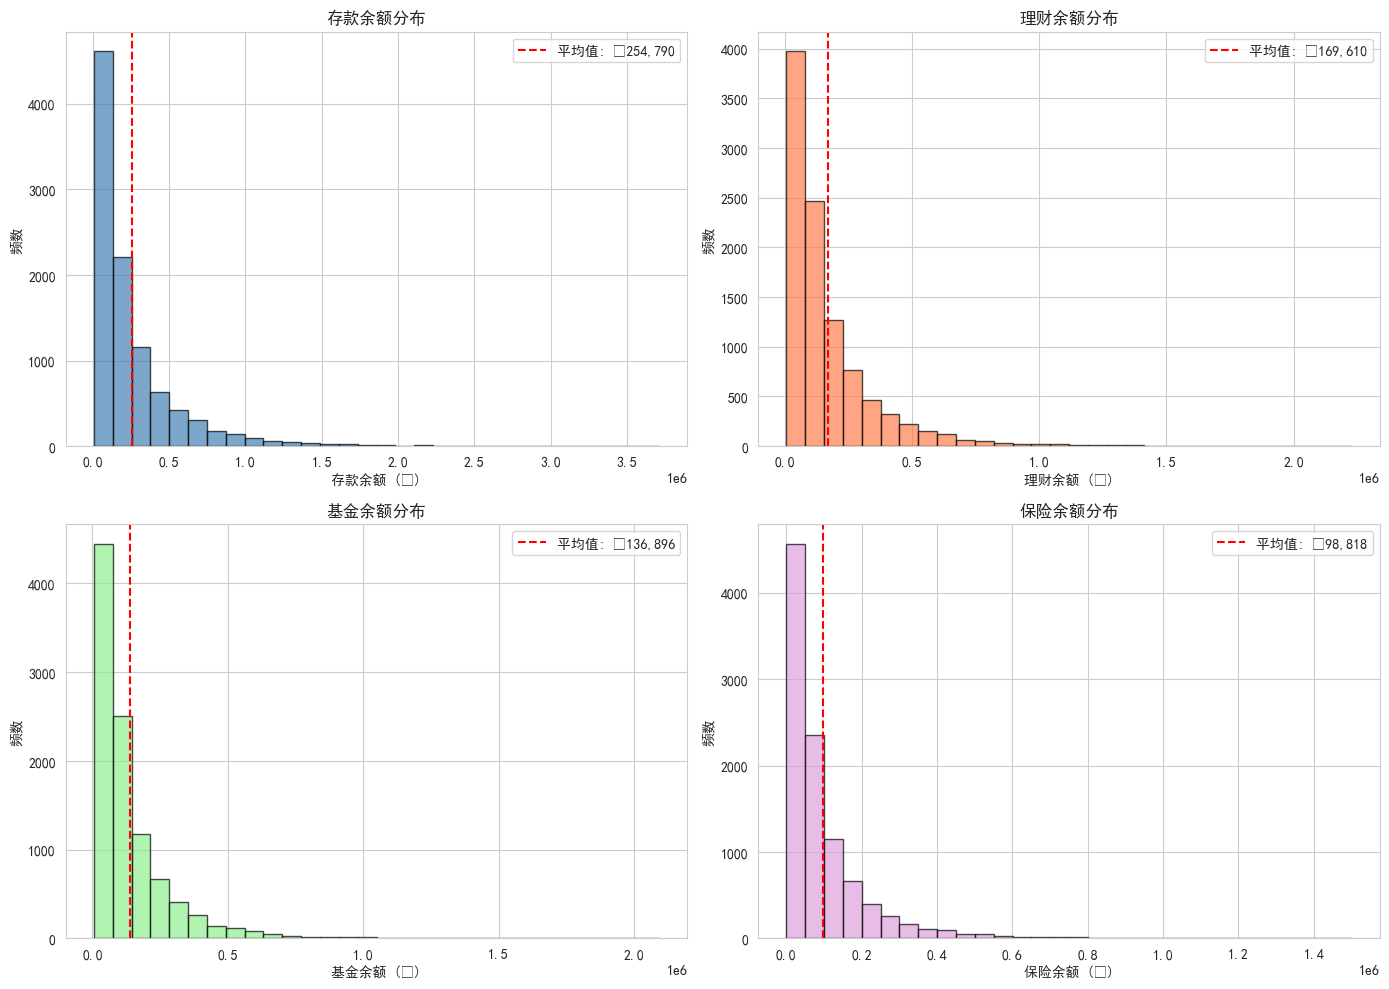


各类资产统计:

存款余额:
  平均值: ¥254,790.00
  中位数: ¥145,194.50
  非零客户数: 10000

理财余额:
  平均值: ¥169,610.36
  中位数: ¥104,201.29
  非零客户数: 10000

基金余额:
  平均值: ¥136,895.99
  中位数: ¥85,054.49
  非零客户数: 10000

保险余额:
  平均值: ¥98,817.65
  中位数: ¥56,896.29
  非零客户数: 10000


In [10]:
# 各类资产明细
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

asset_types = ['deposit_balance', 'financial_balance', 'fund_balance', 'insurance_balance']
asset_names = ['存款余额', '理财余额', '基金余额', '保险余额']
colors_list = ['steelblue', 'coral', 'lightgreen', 'plum']

for idx, (asset_type, asset_name, color) in enumerate(zip(asset_types, asset_names, colors_list)):
    ax = axes[idx // 2, idx % 2]
    ax.hist(customer_behavior_latest[asset_type], bins=30, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel(f'{asset_name} (¥)')
    ax.set_ylabel('频数')
    ax.set_title(f'{asset_name}分布')
    ax.axvline(customer_behavior_latest[asset_type].mean(), color='red', linestyle='--', label=f'平均值: ¥{customer_behavior_latest[asset_type].mean():,.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("\n各类资产统计:")
for asset_type, asset_name in zip(asset_types, asset_names):
    print(f"\n{asset_name}:")
    print(f"  平均值: ¥{customer_behavior_latest[asset_type].mean():,.2f}")
    print(f"  中位数: ¥{customer_behavior_latest[asset_type].median():,.2f}")
    print(f"  非零客户数: {(customer_behavior_latest[asset_type] > 0).sum()}")

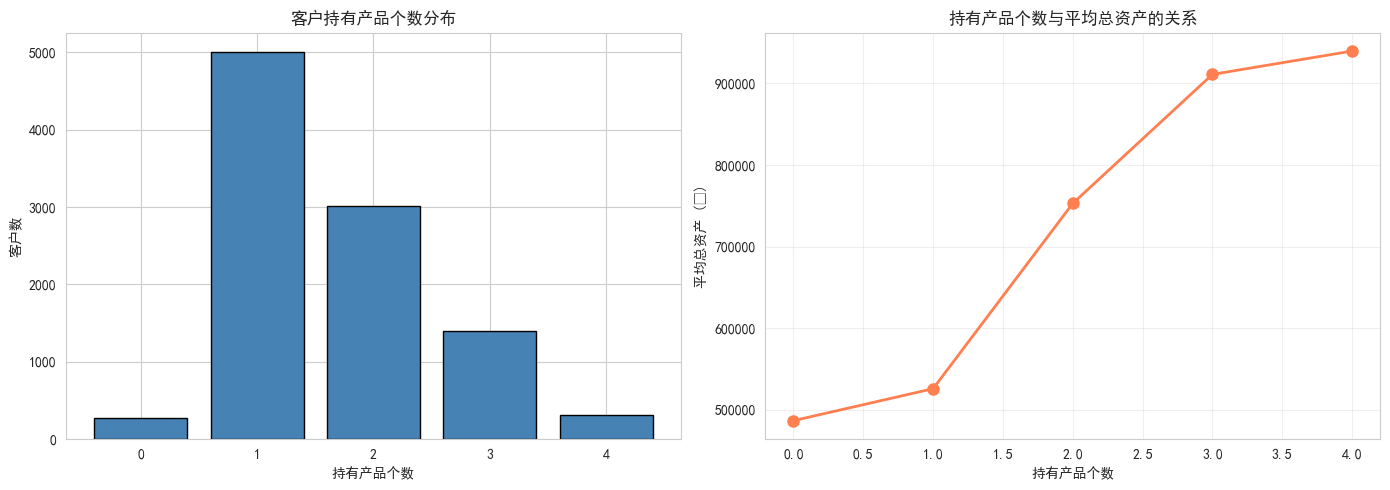


产品个数统计:
product_count
0     271
1    5002
2    3014
3    1397
4     316
Name: count, dtype: int64

平均持有产品数: 1.65


In [11]:
# 产品个数分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 产品个数分布
product_count_dist = customer_behavior_latest['product_count'].value_counts().sort_index()
axes[0].bar(product_count_dist.index, product_count_dist.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('持有产品个数')
axes[0].set_ylabel('客户数')
axes[0].set_title('客户持有产品个数分布')

# 产品个数与总资产的关系
product_asset_relation = customer_behavior_latest.groupby('product_count')['total_assets'].mean()
axes[1].plot(product_asset_relation.index, product_asset_relation.values, marker='o', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('持有产品个数')
axes[1].set_ylabel('平均总资产 (¥)')
axes[1].set_title('持有产品个数与平均总资产的关系')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n产品个数统计:")
print(product_count_dist)
print(f"\n平均持有产品数: {customer_behavior_latest['product_count'].mean():.2f}")

## 6. 行为指标分析

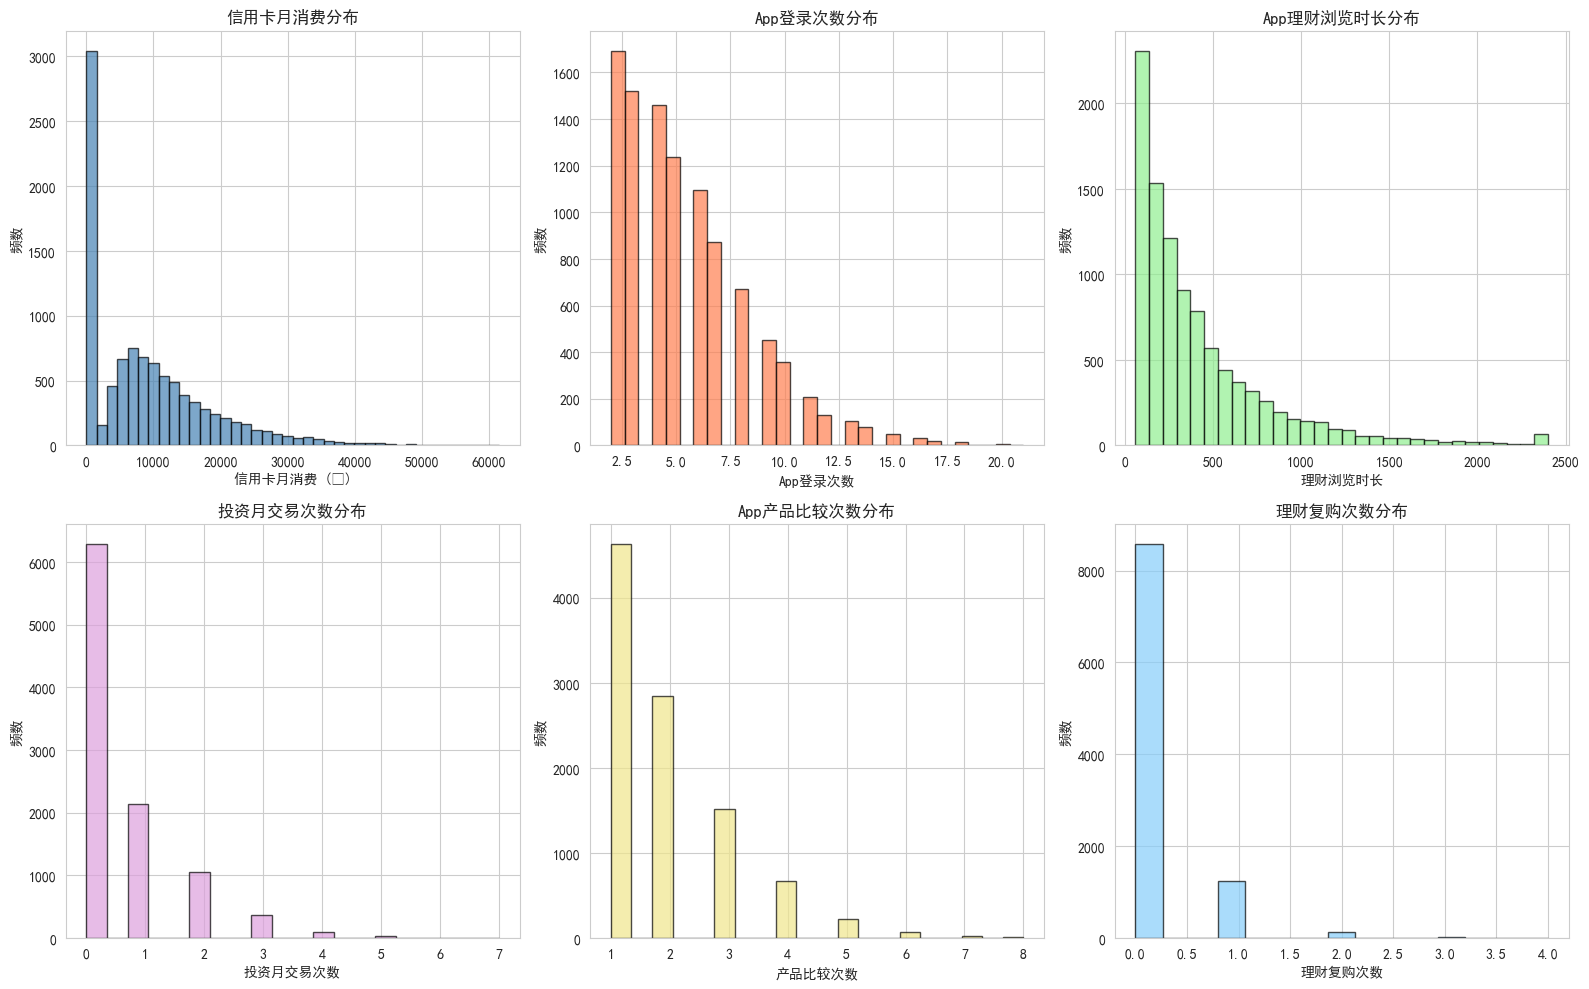


行为指标统计:
       credit_card_monthly_expense  app_login_count  app_financial_view_time  \
count                 10000.000000     10000.000000             10000.000000   
mean                   9349.623751         5.392200               428.511700   
std                    9562.698514         3.006507               414.977243   
min                       0.000000         2.000000                60.000000   
25%                       0.000000         3.000000               146.000000   
50%                    7525.080000         5.000000               290.000000   
75%                   14096.655000         7.000000               558.000000   
max                   61480.310000        21.000000              2400.000000   

       investment_monthly_count  app_product_compare_count  \
count              10000.000000               10000.000000   
mean                   0.595100                   1.935300   
std                    0.932117                   1.134479   
min                   

In [12]:
# 行为指标分析
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 信用卡月消费
axes[0, 0].hist(customer_behavior_latest['credit_card_monthly_expense'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('信用卡月消费 (¥)')
axes[0, 0].set_ylabel('频数')
axes[0, 0].set_title('信用卡月消费分布')

# App登录次数
axes[0, 1].hist(customer_behavior_latest['app_login_count'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('App登录次数')
axes[0, 1].set_ylabel('频数')
axes[0, 1].set_title('App登录次数分布')

# App理财浏览时长
axes[0, 2].hist(customer_behavior_latest['app_financial_view_time'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('理财浏览时长')
axes[0, 2].set_ylabel('频数')
axes[0, 2].set_title('App理财浏览时长分布')

# 投资月交易次数
axes[1, 0].hist(customer_behavior_latest['investment_monthly_count'], bins=20, color='plum', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('投资月交易次数')
axes[1, 0].set_ylabel('频数')
axes[1, 0].set_title('投资月交易次数分布')

# 产品比较次数
axes[1, 1].hist(customer_behavior_latest['app_product_compare_count'], bins=20, color='khaki', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('产品比较次数')
axes[1, 1].set_ylabel('频数')
axes[1, 1].set_title('App产品比较次数分布')

# 理财复购次数
axes[1, 2].hist(customer_behavior_latest['financial_repurchase_count'], bins=15, color='lightskyblue', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('理财复购次数')
axes[1, 2].set_ylabel('频数')
axes[1, 2].set_title('理财复购次数分布')

plt.tight_layout()
plt.show()

print("\n行为指标统计:")
behavior_cols = ['credit_card_monthly_expense', 'app_login_count', 'app_financial_view_time', 
                  'investment_monthly_count', 'app_product_compare_count', 'financial_repurchase_count']
print(customer_behavior_latest[behavior_cols].describe())

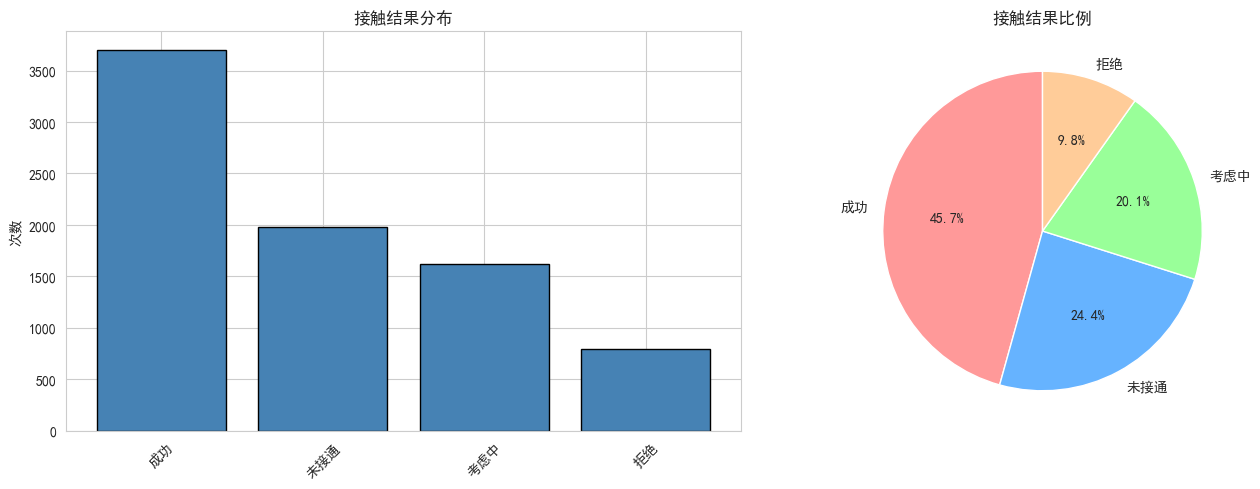


接触结果分布:
contact_result
成功     3697
未接通    1978
考虑中    1624
拒绝      795
Name: count, dtype: int64

接触成功率: 45.68%


In [13]:
# 接触结果分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 接触结果分布
contact_result_counts = customer_behavior_latest['contact_result'].value_counts()
axes[0].bar(contact_result_counts.index, contact_result_counts.values, color='steelblue', edgecolor='black')
axes[0].set_ylabel('次数')
axes[0].set_title('接触结果分布')
axes[0].tick_params(axis='x', rotation=45)

# 接触结果比例
contact_result_pct = (contact_result_counts / contact_result_counts.sum() * 100)
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[1].pie(contact_result_counts.values, labels=contact_result_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_pie[:len(contact_result_counts)])
axes[1].set_title('接触结果比例')

plt.tight_layout()
plt.show()

print("\n接触结果分布:")
print(contact_result_counts)
print(f"\n接触成功率: {contact_result_pct.get('成功', 0):.2f}%")


App登录情况:
  未登录客户: 0 人 (0.00%)
  已登录客户: 10000 人 (100.00%)
  平均登录次数: 5.39


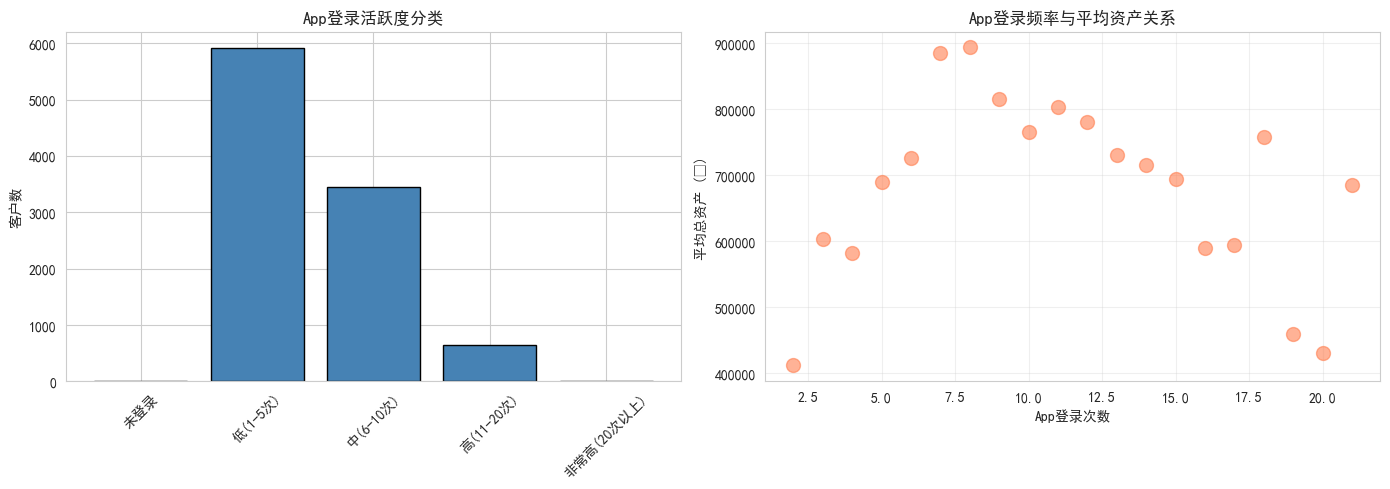

In [14]:
# App登录情况分析
app_login_zero = (customer_behavior_latest['app_login_count'] == 0).sum()
app_login_zero_pct = (app_login_zero / len(customer_behavior_latest) * 100)

print(f"\nApp登录情况:")
print(f"  未登录客户: {app_login_zero} 人 ({app_login_zero_pct:.2f}%)")
print(f"  已登录客户: {len(customer_behavior_latest) - app_login_zero} 人 ({100-app_login_zero_pct:.2f}%)")
print(f"  平均登录次数: {customer_behavior_latest['app_login_count'].mean():.2f}")

# App活跃度分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# App登录活跃度
login_activity = pd.cut(customer_behavior_latest['app_login_count'], 
                         bins=[-1, 0, 5, 10, 20, float('inf')],
                         labels=['未登录', '低(1-5次)', '中(6-10次)', '高(11-20次)', '非常高(20次以上)'])
login_counts = login_activity.value_counts().sort_index()
axes[0].bar(login_counts.index, login_counts.values, color='steelblue', edgecolor='black')
axes[0].set_ylabel('客户数')
axes[0].set_title('App登录活跃度分类')
axes[0].tick_params(axis='x', rotation=45)

# 登录频率与资产的关系
login_asset_relation = customer_behavior_latest.groupby('app_login_count')['total_assets'].mean().head(20)
axes[1].scatter(login_asset_relation.index, login_asset_relation.values, s=100, color='coral', alpha=0.6)
axes[1].set_xlabel('App登录次数')
axes[1].set_ylabel('平均总资产 (¥)')
axes[1].set_title('App登录频率与平均资产关系')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. 相关性分析

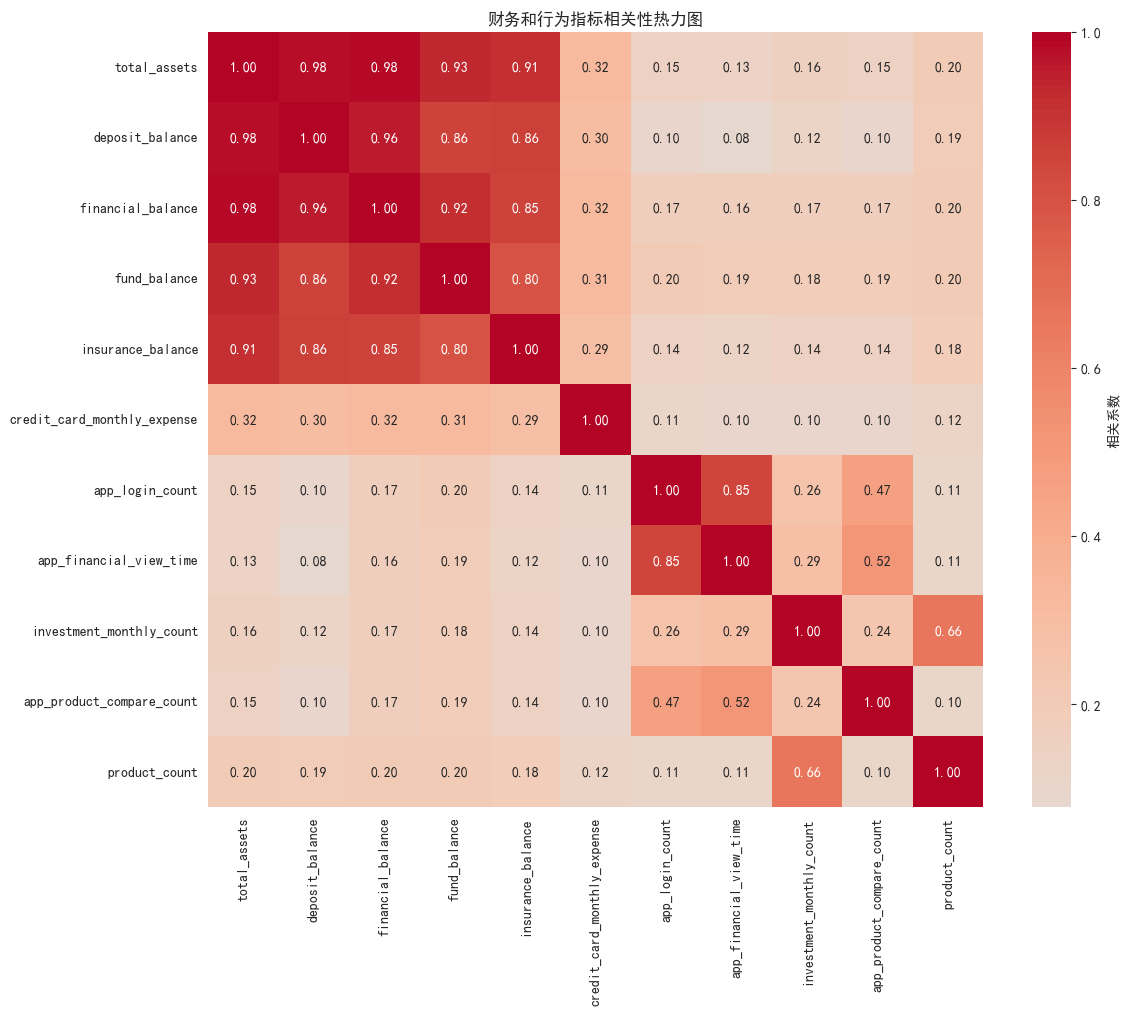


与总资产的相关系数 (前10):
financial_balance              0.984155
deposit_balance                0.979615
fund_balance                   0.930299
insurance_balance              0.907007
credit_card_monthly_expense    0.318931
product_count                  0.202379
investment_monthly_count       0.155630
app_login_count                0.149346
app_product_compare_count      0.145209
app_financial_view_time        0.133320
Name: total_assets, dtype: float64


In [15]:
# 准备相关性分析数据
corr_data = customer_behavior_latest[[
    'total_assets', 'deposit_balance', 'financial_balance', 'fund_balance', 'insurance_balance',
    'credit_card_monthly_expense', 'app_login_count', 'app_financial_view_time',
    'investment_monthly_count', 'app_product_compare_count', 'product_count'
]].copy()

# 计算相关性矩阵
corr_matrix = corr_data.corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': '相关系数'}, square=True)
plt.title('财务和行为指标相关性热力图')
plt.tight_layout()
plt.show()

print("\n与总资产的相关系数 (前10):")
asset_corr = corr_matrix['total_assets'].sort_values(ascending=False)
print(asset_corr[asset_corr.index != 'total_assets'][:10])

## 8. 交叉分析

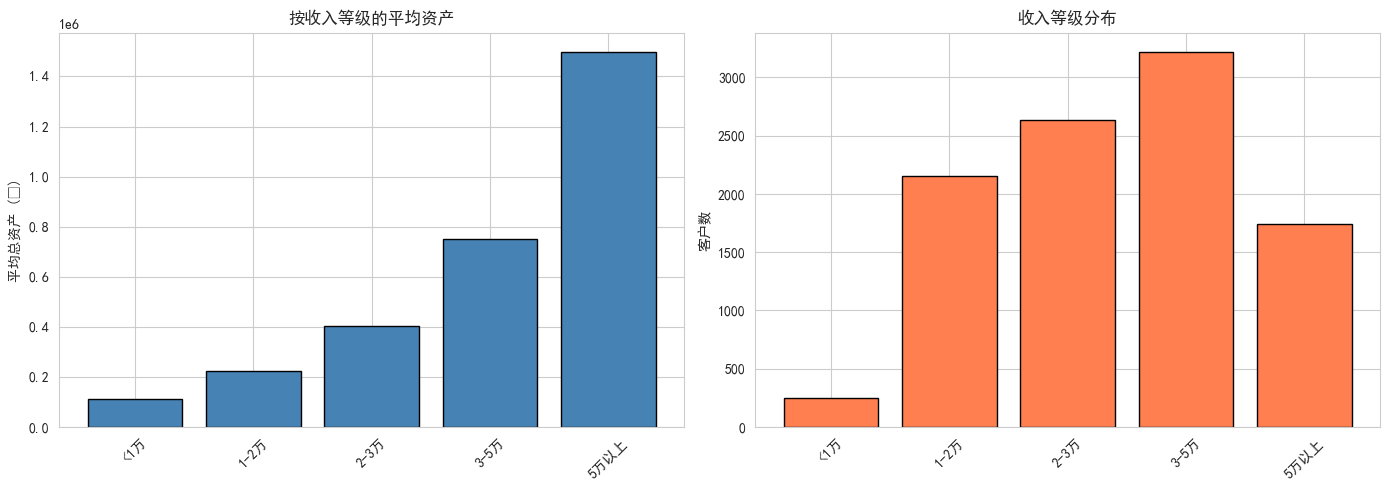


按收入等级统计:
                      mean  count
income_level                     
<1万           1.128868e+05    252
1-2万          2.241192e+05   2151
2-3万          4.020882e+05   2635
3-5万          7.516422e+05   3222
5万以上          1.499608e+06   1740


In [16]:
# 按收入等级分析
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 收入等级划分
income_bins = [0, 10000, 20000, 30000, 50000, float('inf')]
income_labels = ['<1万', '1-2万', '2-3万', '3-5万', '5万以上']
merged_data['income_level'] = pd.cut(merged_data['monthly_income'], bins=income_bins, labels=income_labels)

# 收入等级与平均资产
income_asset_relation = merged_data.groupby('income_level')['total_assets'].agg(['mean', 'count'])
axes[0].bar(income_asset_relation.index, income_asset_relation['mean'], color='steelblue', edgecolor='black')
axes[0].set_ylabel('平均总资产 (¥)')
axes[0].set_title('按收入等级的平均资产')
axes[0].tick_params(axis='x', rotation=45)

# 收入等级分布
axes[1].bar(income_asset_relation.index, income_asset_relation['count'], color='coral', edgecolor='black')
axes[1].set_ylabel('客户数')
axes[1].set_title('收入等级分布')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n按收入等级统计:")
print(income_asset_relation)

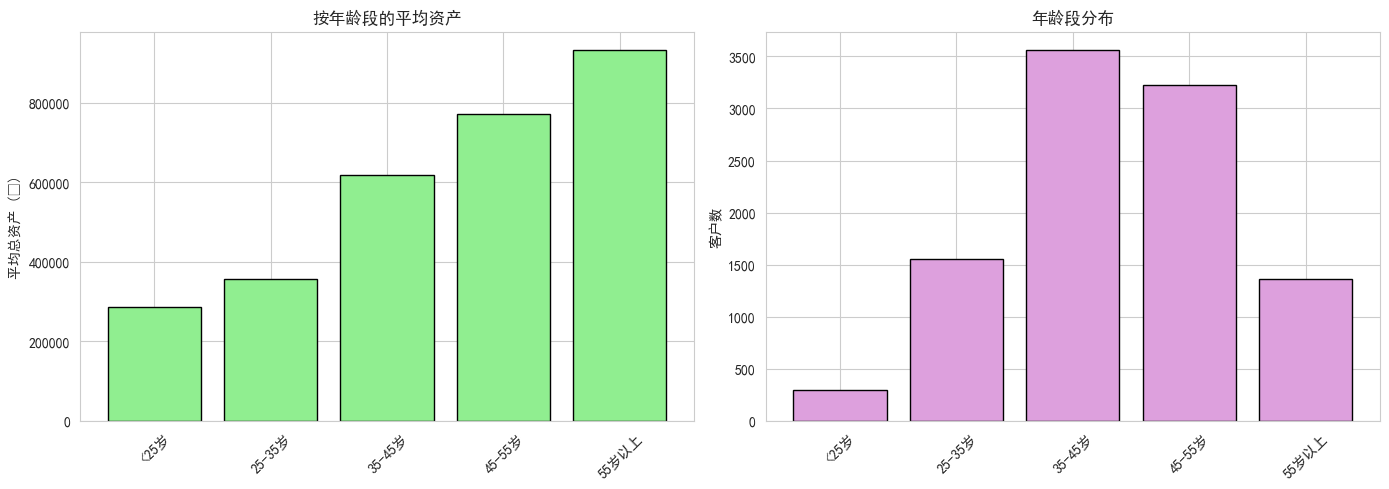


按年龄段统计:
                    mean  count
age_group                      
<25岁       287401.787912    297
25-35岁     355746.444553   1555
35-45岁     617778.760579   3560
45-55岁     772626.627992   3222
55岁以上      932577.325124   1366


In [17]:
# 按年龄段分析
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['<25岁', '25-35岁', '35-45岁', '45-55岁', '55岁以上']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=age_bins, labels=age_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 年龄段与平均资产
age_asset_relation = merged_data.groupby('age_group')['total_assets'].agg(['mean', 'count'])
axes[0].bar(age_asset_relation.index, age_asset_relation['mean'], color='lightgreen', edgecolor='black')
axes[0].set_ylabel('平均总资产 (¥)')
axes[0].set_title('按年龄段的平均资产')
axes[0].tick_params(axis='x', rotation=45)

# 年龄段分布
axes[1].bar(age_asset_relation.index, age_asset_relation['count'], color='plum', edgecolor='black')
axes[1].set_ylabel('客户数')
axes[1].set_title('年龄段分布')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n按年龄段统计:")
print(age_asset_relation)

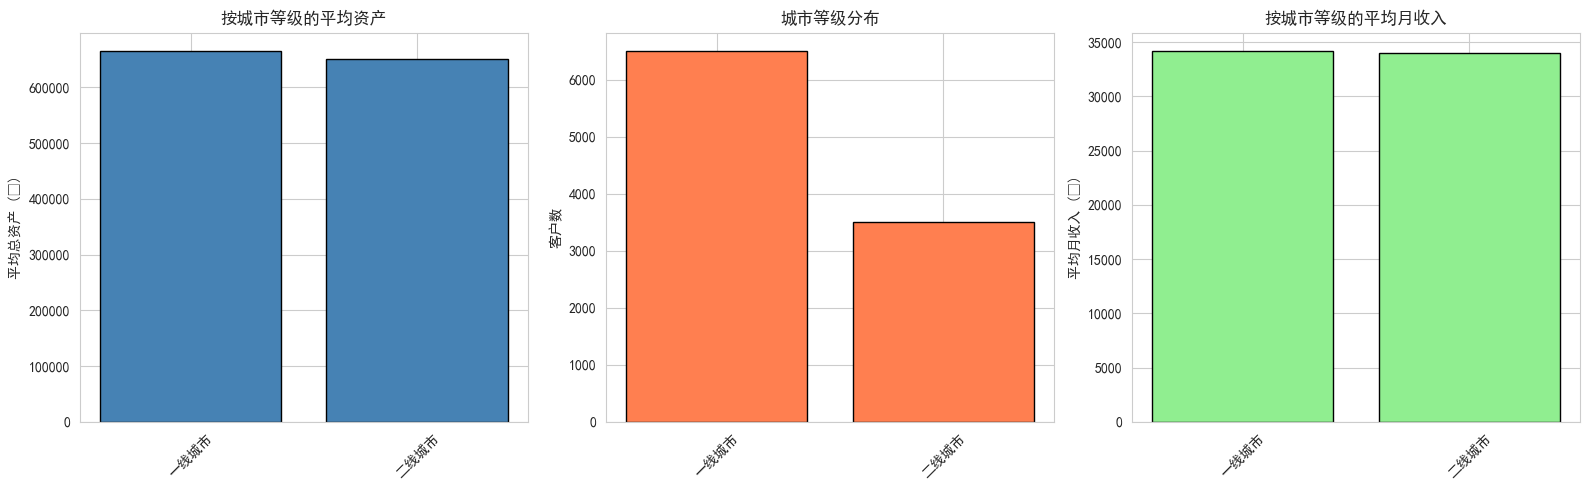


按城市等级统计:
             total_assets  count  monthly_income
city_level                                      
一线城市        664786.192018   6500    34162.197918
二线城市        651437.089526   3500    33964.476254


In [18]:
# 按城市等级分析
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

city_analysis = merged_data.groupby('city_level').agg({
    'total_assets': 'mean',
    'customer_id': 'count',
    'monthly_income': 'mean'
}).rename(columns={'customer_id': 'count'})

axes[0].bar(city_analysis.index, city_analysis['total_assets'], color='steelblue', edgecolor='black')
axes[0].set_ylabel('平均总资产 (¥)')
axes[0].set_title('按城市等级的平均资产')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(city_analysis.index, city_analysis['count'], color='coral', edgecolor='black')
axes[1].set_ylabel('客户数')
axes[1].set_title('城市等级分布')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(city_analysis.index, city_analysis['monthly_income'], color='lightgreen', edgecolor='black')
axes[2].set_ylabel('平均月收入 (¥)')
axes[2].set_title('按城市等级的平均月收入')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n按城市等级统计:")
print(city_analysis)

## 9. 商业洞察总结

In [19]:
# 关键指标汇总
print("="*70)
print("EDA 关键发现总结")
print("="*70)

print("\n📊 数据规模:")
print(f"  • 客户总数: {len(customer_base):,} 人")
print(f"  • 行为记录: {len(customer_behavior):,} 条")
print(f"  • 覆盖时间: {customer_behavior['stat_month'].min()} - {customer_behavior['stat_month'].max()}")

print("\n👥 客户特征:")
print(f"  • 平均年龄: {customer_base['age'].mean():.1f} 岁")
print(f"  • 男女比例: {(customer_base['gender']=='男').sum()}/{(customer_base['gender']=='女').sum()}")
print(f"  • 平均月收入: ¥{customer_base['monthly_income'].mean():,.0f}")
print(f"  • 最高月收入: ¥{customer_base['monthly_income'].max():,.0f}")

print("\n💰 资产情况:")
print(f"  • 平均总资产: ¥{customer_behavior_latest['total_assets'].mean():,.0f}")
print(f"  • 中位数资产: ¥{customer_behavior_latest['total_assets'].median():,.0f}")
print(f"  • 最大资产: ¥{customer_behavior_latest['total_assets'].max():,.0f}")
high_net_worth = (customer_behavior_latest['total_assets'] >= 1000000).sum()
print(f"  • 高净值客户(100万+): {high_net_worth} 人 ({high_net_worth/len(customer_behavior_latest)*100:.1f}%)")

print("\n📦 产品持有:")
deposit_rate = customer_behavior_latest['deposit_flag'].sum() / len(customer_behavior_latest) * 100
financial_rate = customer_behavior_latest['financial_flag'].sum() / len(customer_behavior_latest) * 100
fund_rate = customer_behavior_latest['fund_flag'].sum() / len(customer_behavior_latest) * 100
insurance_rate = customer_behavior_latest['insurance_flag'].sum() / len(customer_behavior_latest) * 100
print(f"  • 存款产品持有率: {deposit_rate:.1f}%")
print(f"  • 理财产品持有率: {financial_rate:.1f}%")
print(f"  • 基金产品持有率: {fund_rate:.1f}%")
print(f"  • 保险产品持有率: {insurance_rate:.1f}%")
print(f"  • 平均持有产品数: {customer_behavior_latest['product_count'].mean():.2f}")

print("\n📱 行为指标:")
active_users = (customer_behavior_latest['app_login_count'] > 0).sum()
app_active_rate = active_users / len(customer_behavior_latest) * 100
print(f"  • App活跃用户: {active_users} 人 ({app_active_rate:.1f}%)")
print(f"  • 平均App登录次数: {customer_behavior_latest['app_login_count'].mean():.2f}")
print(f"  • 平均信用卡月消费: ¥{customer_behavior_latest['credit_card_monthly_expense'].mean():,.0f}")
print(f"  • 有投资记录的客户: {(customer_behavior_latest['investment_monthly_count']>0).sum()} 人 ({(customer_behavior_latest['investment_monthly_count']>0).sum()/len(customer_behavior_latest)*100:.1f}%)")

print("\n📞 接触效果:")
contact_success = (customer_behavior_latest['contact_result'] == '成功').sum()
contact_success_rate = contact_success / len(customer_behavior_latest) * 100
print(f"  • 接触成功率: {contact_success_rate:.1f}%")
print(f"  • 接触结果分布:")
for result, count in customer_behavior_latest['contact_result'].value_counts().items():
    print(f"    - {result}: {count} 次 ({count/len(customer_behavior_latest)*100:.1f}%)")

print("\n" + "="*70)

EDA 关键发现总结

📊 数据规模:
  • 客户总数: 10,000 人
  • 行为记录: 120,000 条
  • 覆盖时间: 2024-07 - 2025-06

👥 客户特征:
  • 平均年龄: 44.5 岁
  • 男女比例: 5054/4946
  • 平均月收入: ¥34,093
  • 最高月收入: ¥99,949

💰 资产情况:
  • 平均总资产: ¥660,114
  • 中位数资产: ¥403,110
  • 最大资产: ¥7,732,842
  • 高净值客户(100万+): 1985 人 (19.9%)

📦 产品持有:
  • 存款产品持有率: 95.2%
  • 理财产品持有率: 28.5%
  • 基金产品持有率: 19.6%
  • 保险产品持有率: 21.6%
  • 平均持有产品数: 1.65

📱 行为指标:
  • App活跃用户: 10000 人 (100.0%)
  • 平均App登录次数: 5.39
  • 平均信用卡月消费: ¥9,350
  • 有投资记录的客户: 3708 人 (37.1%)

📞 接触效果:
  • 接触成功率: 37.0%
  • 接触结果分布:
    - 成功: 3697 次 (37.0%)
    - 未接通: 1978 次 (19.8%)
    - 考虑中: 1624 次 (16.2%)
    - 拒绝: 795 次 (8.0%)



In [20]:
# 商业机会分析
print("\n🎯 商业机会识别:")
print("\n1. 产品升级机会:")
print(f"   • 理财产品升级空间: {100-financial_rate:.1f}% 的客户未持有理财产品")
print(f"   • 基金产品升级空间: {100-fund_rate:.1f}% 的客户未持有基金产品")
print(f"   • 保险产品升级空间: {100-insurance_rate:.1f}% 的客户未持有保险产品")

print("\n2. 客户活跃度提升:")
inactive_app = (customer_behavior_latest['app_login_count'] == 0).sum()
print(f"   • App未登录客户: {inactive_app} 人 ({inactive_app/len(customer_behavior_latest)*100:.1f}%)")
print(f"   • 需要拉活营销的客户: 约 {inactive_app} 人")

print("\n3. 投资市场机会:")
no_investment = (customer_behavior_latest['investment_monthly_count'] == 0).sum()
print(f"   • 无投资记录的客户: {no_investment} 人 ({no_investment/len(customer_behavior_latest)*100:.1f}%)")
print(f"   • 巨大的投资理财市场机会")

print("\n4. 营销效率优化:")
print(f"   • 当前接触成功率仅 {contact_success_rate:.1f}%")
print(f"   • 优化营销策略可能提升 30-50% 的成功率")
print(f"   • 建议分群精准营销")

print("\n5. 高价值客户识别:")
print(f"   • 高净值客户(100万+): {high_net_worth} 人")
print(f"   • VIP客户占比: {high_net_worth/len(customer_behavior_latest)*100:.1f}%")
print(f"   • 建议设立专属服务")

print("\n" + "="*70)


🎯 商业机会识别:

1. 产品升级机会:
   • 理财产品升级空间: 71.5% 的客户未持有理财产品
   • 基金产品升级空间: 80.4% 的客户未持有基金产品
   • 保险产品升级空间: 78.5% 的客户未持有保险产品

2. 客户活跃度提升:
   • App未登录客户: 0 人 (0.0%)
   • 需要拉活营销的客户: 约 0 人

3. 投资市场机会:
   • 无投资记录的客户: 6292 人 (62.9%)
   • 巨大的投资理财市场机会

4. 营销效率优化:
   • 当前接触成功率仅 37.0%
   • 优化营销策略可能提升 30-50% 的成功率
   • 建议分群精准营销

5. 高价值客户识别:
   • 高净值客户(100万+): 1985 人
   • VIP客户占比: 19.9%
   • 建议设立专属服务



In [21]:
# 数据质量总体评估
print("\n✓ 数据质量评估:")
print("\n客户基本信息表:")
print(f"  • 总记录数: {len(customer_base):,}")
print(f"  • 完整性: {(1 - customer_base.isnull().sum().sum() / (len(customer_base) * len(customer_base.columns))) * 100:.1f}%")
print(f"  • 无重复记录: {customer_base.duplicated().sum() == 0}")

print("\n客户行为资产表:")
print(f"  • 总记录数: {len(customer_behavior):,}")
print(f"  • 覆盖客户: {customer_behavior['customer_id'].nunique():,}")
print(f"  • 完整性: {(1 - customer_behavior.isnull().sum().sum() / (len(customer_behavior) * len(customer_behavior.columns))) * 100:.1f}%")

print("\n📌 数据质量等级: 优秀")
print("   缺失值少于5%，数据结构清晰，适合进行深度分析")

print("\n" + "="*70)
print("EDA分析完成！")
print("="*70)


✓ 数据质量评估:

客户基本信息表:
  • 总记录数: 10,000
  • 完整性: 100.0%
  • 无重复记录: True

客户行为资产表:
  • 总记录数: 120,000
  • 覆盖客户: 10,000
  • 完整性: 98.3%

📌 数据质量等级: 优秀
   缺失值少于5%，数据结构清晰，适合进行深度分析

EDA分析完成！


## 10. 推荐后续行动

In [22]:
print("\n📋 推荐后续行动:\n")
print("1️⃣  数据工程:")
print("   ✓ 已完成: EDA分析和数据理解")
print("   → 下一步: 数据清洗和特征工程 (AWS Glue)")
print("   → 参考文档: docs/feature-engineering/AWS_Glue_QuickStart_Guide.md\n")

print("2️⃣  客户分群:")
print("   建议使用K-means或层次聚类")
print(f"   基于: 资产水平、产品持有、App活跃度、收入等级\n")

print("3️⃣  营销策略:")
print("   • 针对未登录App用户的拉活营销")
print("   • 针对无投资记录用户的投资理财营销")
print("   • 针对高净值客户的VIP服务")
print("   • 产品交叉销售机会分析\n")

print("4️⃣  风险管理:")
print("   • 建立客户流失风险预警")
print("   • 监控接触成功率，持续优化营销")
print("   • 数据质量监控和数据验证\n")

print("5️⃣  BI可视化:")
print("   建议开发仪表板展示:")
print("   • 客户总体规模和增长")
print("   • 产品持有率趋势")
print("   • App活跃度监控")
print("   • 营销效果看板")


📋 推荐后续行动:

1️⃣  数据工程:
   ✓ 已完成: EDA分析和数据理解
   → 下一步: 数据清洗和特征工程 (AWS Glue)
   → 参考文档: docs/feature-engineering/AWS_Glue_QuickStart_Guide.md

2️⃣  客户分群:
   建议使用K-means或层次聚类
   基于: 资产水平、产品持有、App活跃度、收入等级

3️⃣  营销策略:
   • 针对未登录App用户的拉活营销
   • 针对无投资记录用户的投资理财营销
   • 针对高净值客户的VIP服务
   • 产品交叉销售机会分析

4️⃣  风险管理:
   • 建立客户流失风险预警
   • 监控接触成功率，持续优化营销
   • 数据质量监控和数据验证

5️⃣  BI可视化:
   建议开发仪表板展示:
   • 客户总体规模和增长
   • 产品持有率趋势
   • App活跃度监控
   • 营销效果看板
